# **Bikes DataSet**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/bikes_data.csv')

In [ ]:
df.head()

,Company,Country of Origin,Model,Number of cc,Horsepower,Torque,Transmission Type,Drivetrain,Number of Seating,Price (in INR),Year,Looks,Body Type,Engine Type,Number of Cylinders
0,Aprilia,Italy,RS 660,659,100 hp,67 Nm,6-speed quickshifter,Chain,2,"INR 10,99,000",2021,Sport,Naked,Parallel-twin,2
1,Aprilia,Italy,Tuono 660,659,100 hp,67 Nm,6-speed quickshifter,Chain,2,"INR 11,99,000",2021,Sport,Naked,Parallel-twin,2
2,Aprilia,Italy,RS 125,124.9,15 hp,12 Nm,6-speed manual,Chain,2,"INR 4,49,000",2022,Sport,Racing,Single-cylinder,1
3,Aprilia,Italy,Shiver 900,896,95 hp,90 Nm,6-speed manual,Shaft,2,"INR 13,99,000",2022,Adventure,Naked,V-twin,2
4,Aprilia,Italy,Tuono 1100,1077,175 hp,121 Nm,6-speed manual,Shaft,2,"INR 19,99,000",2022,Adventure,Naked,V-twin,2


In [ ]:
df.dtypes

Company                object
Country of Origin      object
Model                  object
Number of cc           object
Horsepower             object
Torque                 object
Transmission Type      object
Drivetrain             object
Number of Seating       int64
Price (in INR)         object
Year                    int64
Looks                  object
Body Type              object
Engine Type            object
Number of Cylinders    object
dtype: object

In [ ]:
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df.head()

,Company,Country_of_Origin,Model,Number_of_cc,Horsepower,Torque,Transmission_Type,Drivetrain,Number_of_Seating,Price_(in_INR),Year,Looks,Body_Type,Engine_Type,Number_of_Cylinders
0,Aprilia,Italy,RS 660,659,100 hp,67 Nm,6-speed quickshifter,Chain,2,"INR 10,99,000",2021,Sport,Naked,Parallel-twin,2
1,Aprilia,Italy,Tuono 660,659,100 hp,67 Nm,6-speed quickshifter,Chain,2,"INR 11,99,000",2021,Sport,Naked,Parallel-twin,2
2,Aprilia,Italy,RS 125,124.9,15 hp,12 Nm,6-speed manual,Chain,2,"INR 4,49,000",2022,Sport,Racing,Single-cylinder,1
3,Aprilia,Italy,Shiver 900,896,95 hp,90 Nm,6-speed manual,Shaft,2,"INR 13,99,000",2022,Adventure,Naked,V-twin,2
4,Aprilia,Italy,Tuono 1100,1077,175 hp,121 Nm,6-speed manual,Shaft,2,"INR 19,99,000",2022,Adventure,Naked,V-twin,2


In [ ]:
df['Company'].value_counts()

Benelli             16
Husqvarna           12
Mutt Motorcycles    11
KTM                  9
Genuine Scooters     9
                    ..
Italjet              1
Derbi                1
Ontrack              1
Ampere               1
Fantic               1
Name: Company, Length: 75, dtype: int64

In [ ]:
df['Country_of_Origin'].value_counts()

Italy             92
India             47
China             44
UK                28
Japan             24
United States     19
Taiwan            18
United Kingdom    17
Austria           14
USA               13
Sweden            12
Spain              9
Germany            8
France             8
South Korea        5
Canada             3
Denmark            1
Name: Country_of_Origin, dtype: int64

In [ ]:
df['Model'].value_counts()

Artemis           4
TC                2
Svartpilen 401    2
X-Cape            2
Seiemmezzo 6 ½    2
                 ..
MGX-21            1
Eldorado          1
Audace            1
V9 Roamer         1
Eva Ribelle RS    1
Name: Model, Length: 345, dtype: int64

In [ ]:
df['Number_of_cc'].value_counts()

125     60
250     24
300     12
500      8
110      7
        ..
1133     1
693      1
1158     1
321      1
346      1
Name: Number_of_cc, Length: 139, dtype: int64

In [ ]:
df['Number_of_cc'] = pd.to_numeric(df['Number_of_cc'], errors='coerce').fillna(0).round().astype(int)



In [ ]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'].str.replace(' hp', ''), errors='coerce')


In [ ]:
df['Torque'] = pd.to_numeric(df['Torque'].str.replace('Nm', ''), errors='coerce')

In [ ]:
top_transmissions = df['Transmission_Type'].value_counts().head(5).index
df.loc[~df['Transmission_Type'].isin(top_transmissions), 'Transmission_Type'] = 'Others'

In [ ]:
df['Transmission_Type'].value_counts()

6-speed manual    114
Others             93
Manual             50
CVT                42
Automatic          36
5-speed manual     27
Name: Transmission_Type, dtype: int64

In [ ]:
df['Drivetrain'].value_counts()

Chain                                 110
Chain drive                            93
Automatic                              35
Chain Drive                            22
Belt drive                             20
Electric                               16
Shaft drive                            16
CVT                                    15
Shaft                                  11
Belt                                    4
Shimano drivetrain                      4
Automatic CVT                           3
Front wheel drive                       3
Belt Drive                              2
Parallel twin                           2
Permanent magnet synchronous motor      1
Front Suspension                        1
Single-gear                             1
Dual-motor, all-wheel drive             1
V-twin, liquid-cooled, 4-stroke         1
Rear wheel                              1
Name: Drivetrain, dtype: int64

In [ ]:
top_drivetrains = df['Drivetrain'].value_counts().head(9).index
df.loc[~df['Drivetrain'].isin(top_drivetrains), 'Drivetrain'] = 'Others'

In [ ]:
df['Drivetrain'].value_counts()

Chain          110
Chain drive     93
Automatic       35
Others          24
Chain Drive     22
Belt drive      20
Shaft drive     16
Electric        16
CVT             15
Shaft           11
Name: Drivetrain, dtype: int64

In [ ]:
df['Price_(in_INR)'] = df['Price_(in_INR)'].str.replace('INR ', '')

In [ ]:
df['Price_(in_INR)'] = df['Price_(in_INR)'].str.replace(' lakhs', '')

In [ ]:
df['Price_(in_INR)'] = df['Price_(in_INR)'].str.replace(',', '')


In [ ]:
df['Price_(in_INR)'] = pd.to_numeric(df['Price_(in_INR)'], errors='coerce')

In [ ]:
def convert_price(price_str):
    if isinstance(price_str, (int, float)):
        return price_str
    if 'lakhs' in price_str:
        return int(float(price_str.split(' ')[0].replace(',', '')) * 100000)
    elif 'crores' in price_str:
        return int(float(price_str.split(' ')[0].replace(',', '')) * 10000000)
    else:
        return int(price_str.replace(',', ''))

In [ ]:
df['Price_(in_INR)'] = df['Price_(in_INR)'].apply(convert_price)


In [ ]:
top_looks = df['Looks'].value_counts().head(9).index
df.loc[~df['Looks'].isin(top_looks), 'Looks'] = 'Others'

In [ ]:
df['Number_of_Cylinders'] = df['Number_of_Cylinders'].replace({
    'One': '1',
    'Two': '2',
    'Three': '3',
    'Single':'1'
})

In [ ]:
df['Number_of_Cylinders'] = pd.to_numeric(df['Number_of_Cylinders'], errors='coerce').fillna(0).astype(int)

# **Exploratory Data Analysis**

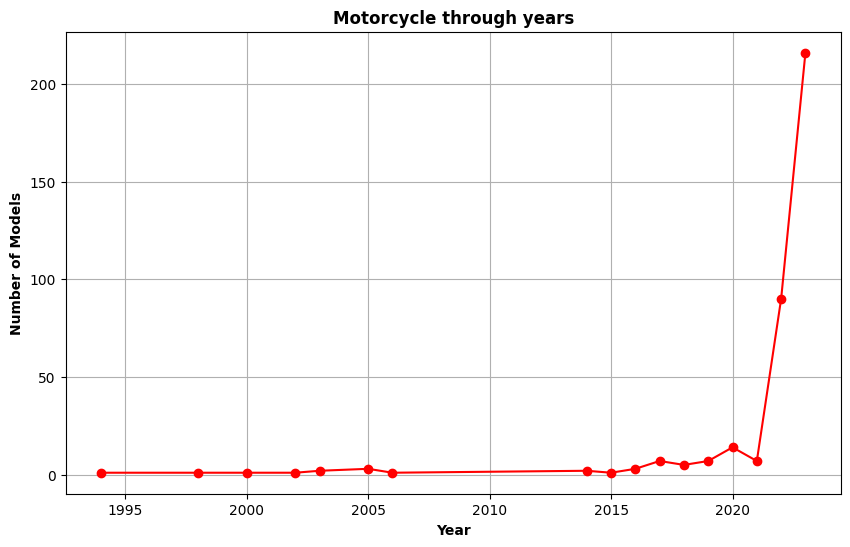

In [ ]:
year_counts = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-', color='r')

plt.title("Motorcycle through years", fontweight='bold')
plt.xlabel("Year", fontweight='bold')
plt.ylabel("Number of Models", fontweight='bold')

plt.grid(True)
plt.show()


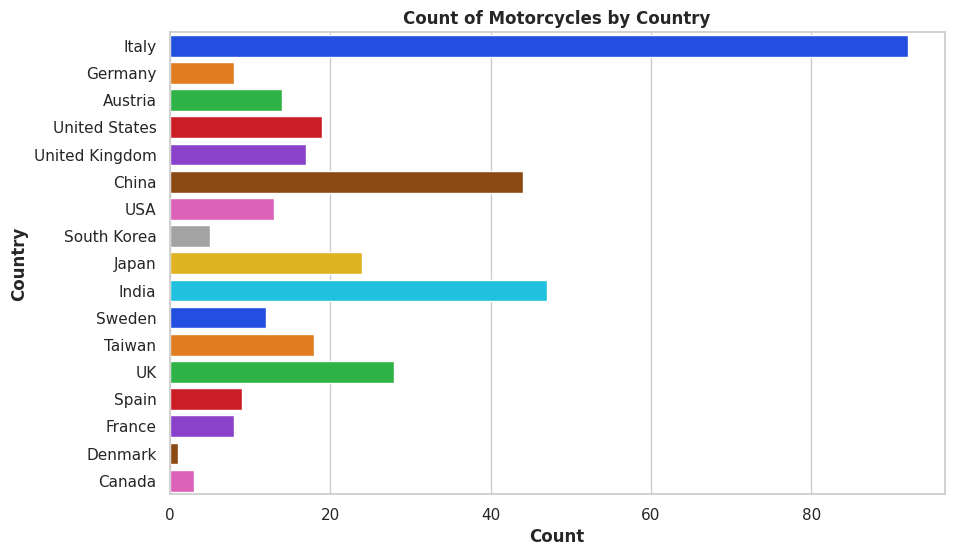

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Country_of_Origin', palette='bright')
plt.title("Count of Motorcycles by Country", fontweight='bold')
plt.xlabel("Count", fontweight='bold')
plt.ylabel("Country", fontweight='bold')
plt.show()


In [ ]:
top_models = df['Model'].value_counts().head(5)

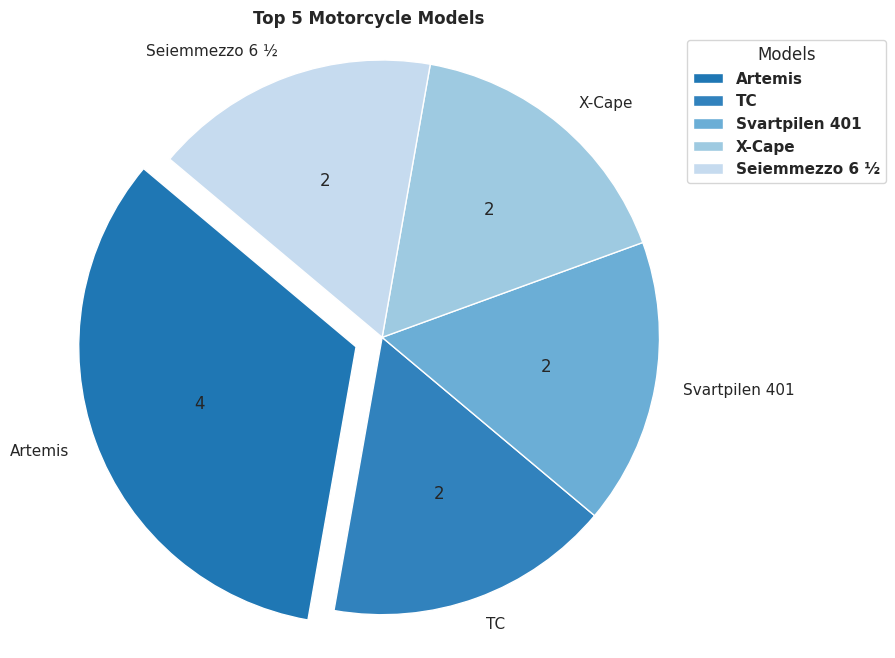

In [ ]:
explode = (0.1, 0, 0, 0, 0)

colors = ['#1f77b4', '#3182bd', '#6baed6', '#9ecae1', '#c6dbef']

plt.figure(figsize=(8, 8))
_, _, autotexts = plt.pie(top_models, labels=top_models.index, autopct='', startangle=140, explode=explode, colors=colors)
plt.title("Top 5 Motorcycle Models", fontweight='bold')
plt.axis('equal')

for i, model_count in enumerate(top_models):
    autotexts[i].set_text(f'{model_count}')

legend_labels = top_models.index
plt.legend(legend_labels, title='Models', loc='best', bbox_to_anchor=(1, 1), prop={'weight':'bold'})

plt.show()

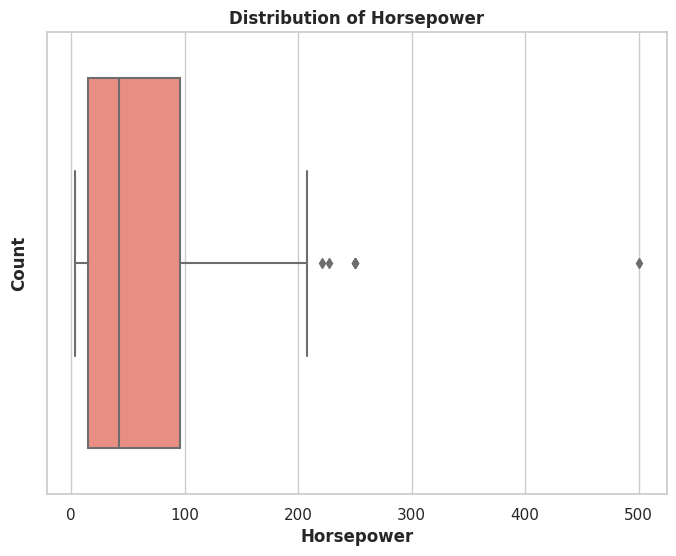

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Horsepower', color='salmon')
plt.title("Distribution of Horsepower", fontweight='bold')
plt.xlabel("Horsepower", fontweight='bold')
plt.ylabel("Count", fontweight='bold')

plt.show()

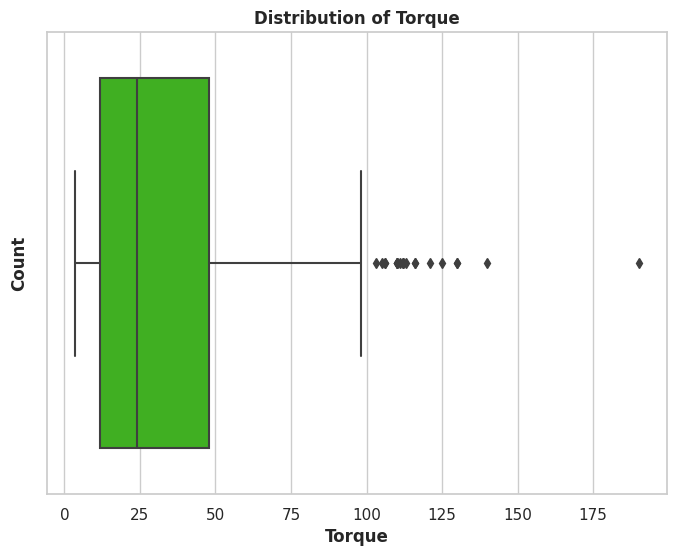

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Torque', color='#32C70A')
plt.title("Distribution of Torque", fontweight='bold')
plt.xlabel("Torque", fontweight='bold')
plt.ylabel("Count", fontweight='bold')

plt.show()

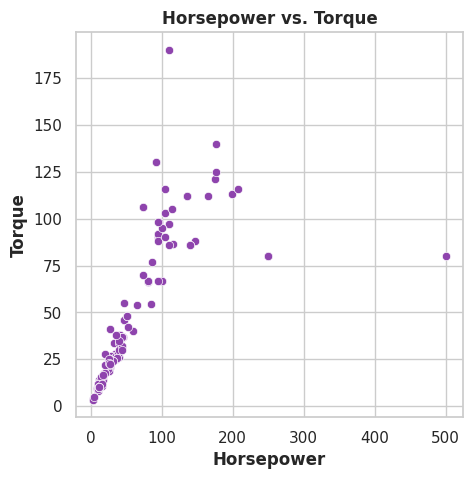

In [ ]:
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df, x='Horsepower', y='Torque', c ='#8E44AD')
plt.title("Horsepower vs. Torque", fontweight='bold')
plt.xlabel("Horsepower", fontweight='bold')
plt.ylabel("Torque", fontweight='bold')
plt.show()


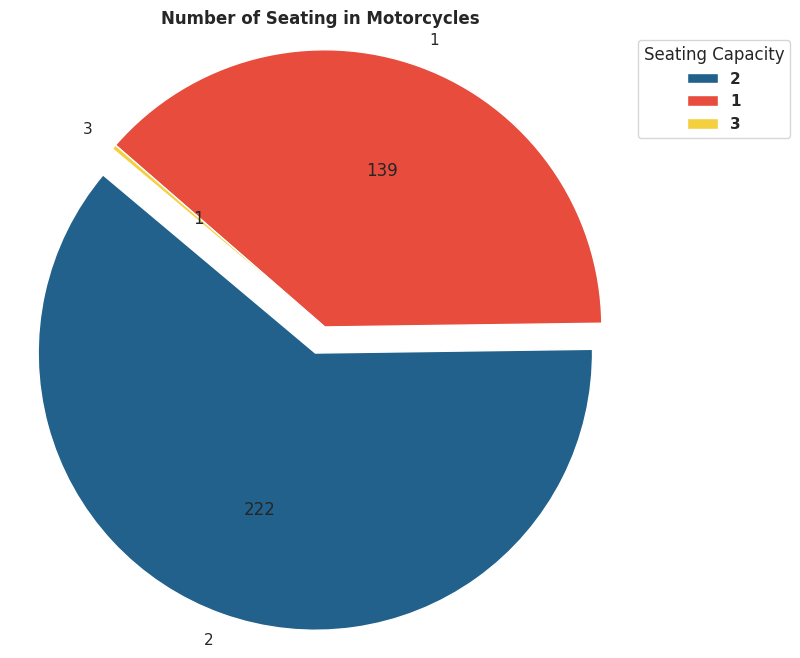

In [ ]:
seating_counts = df['Number_of_Seating'].value_counts()

colors = ['#21618C', '#E74C3C', '#F4D03F']
explode = (0.1, 0, 0)

plt.figure(figsize=(8, 8))
_, _, autotexts = plt.pie(seating_counts, labels=seating_counts.index, autopct='', startangle=140, explode=explode, colors=colors)
plt.title("Number of Seating in Motorcycles", fontweight='bold')
plt.axis('equal')

for i, count in enumerate(seating_counts):
    autotexts[i].set_text(f'{count}')

legend_labels = seating_counts.index
plt.legend(legend_labels, title='Seating Capacity', loc='best', bbox_to_anchor=(1, 1), prop={'weight':'bold'})

plt.show()


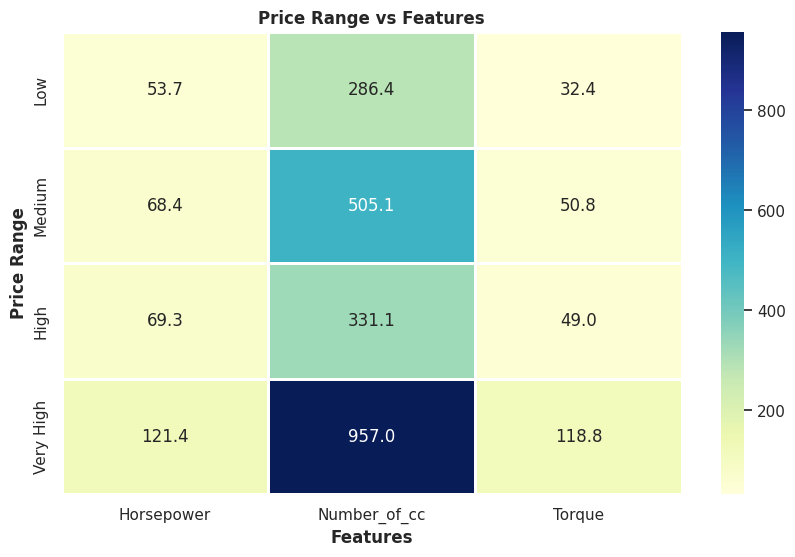

In [ ]:
price_ranges = [0, 500000, 1000000, 1500000, float('inf')]
price_labels = ['Low', 'Medium', 'High', 'Very High']

df['Price_Range'] = pd.cut(df['Price_(in_INR)'], bins=price_ranges, labels=price_labels)

heatmap_data = df.pivot_table(index='Price_Range', values=['Number_of_cc', 'Horsepower', "Torque"], aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', cbar=True,linewidths=0.8)
plt.title("Price Range vs Features", fontweight='bold')
plt.xlabel("Features", fontweight='bold')
plt.ylabel("Price Range", fontweight='bold')

plt.show()


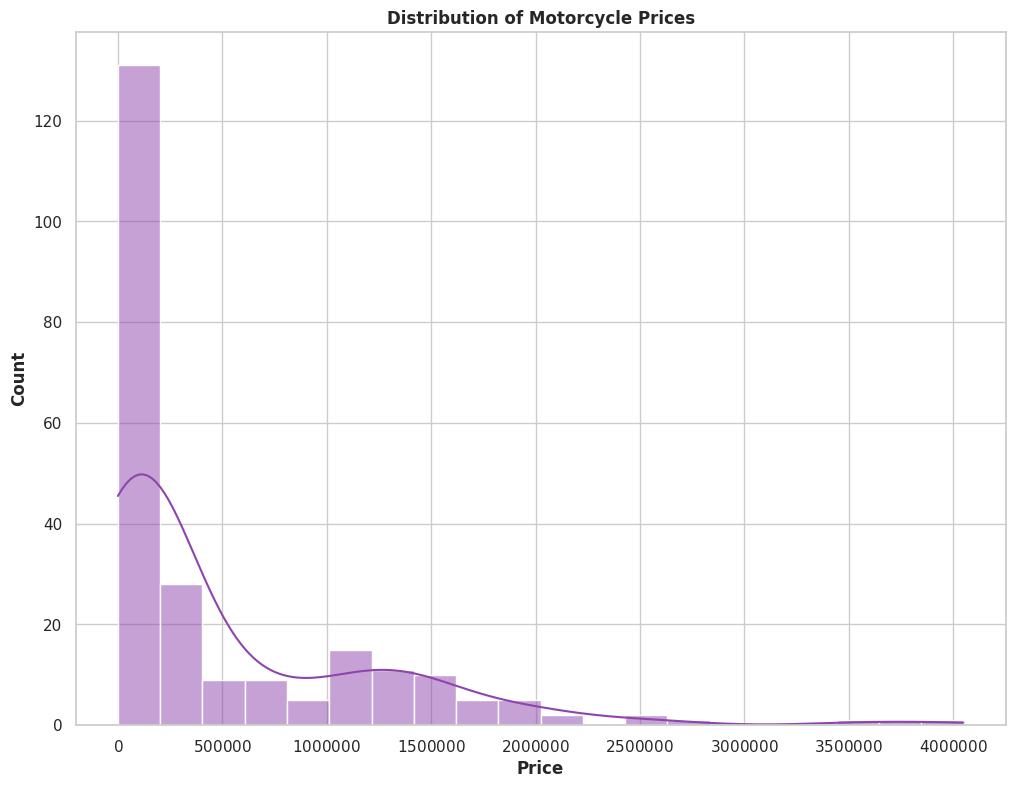

In [ ]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(12, 9))
ax = sns.histplot(df['Price_(in_INR)'], bins=20, kde=True, color='#8E44AD')

ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='x', style='plain')

plt.title("Distribution of Motorcycle Prices", fontweight='bold')
plt.xlabel("Price", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.show()


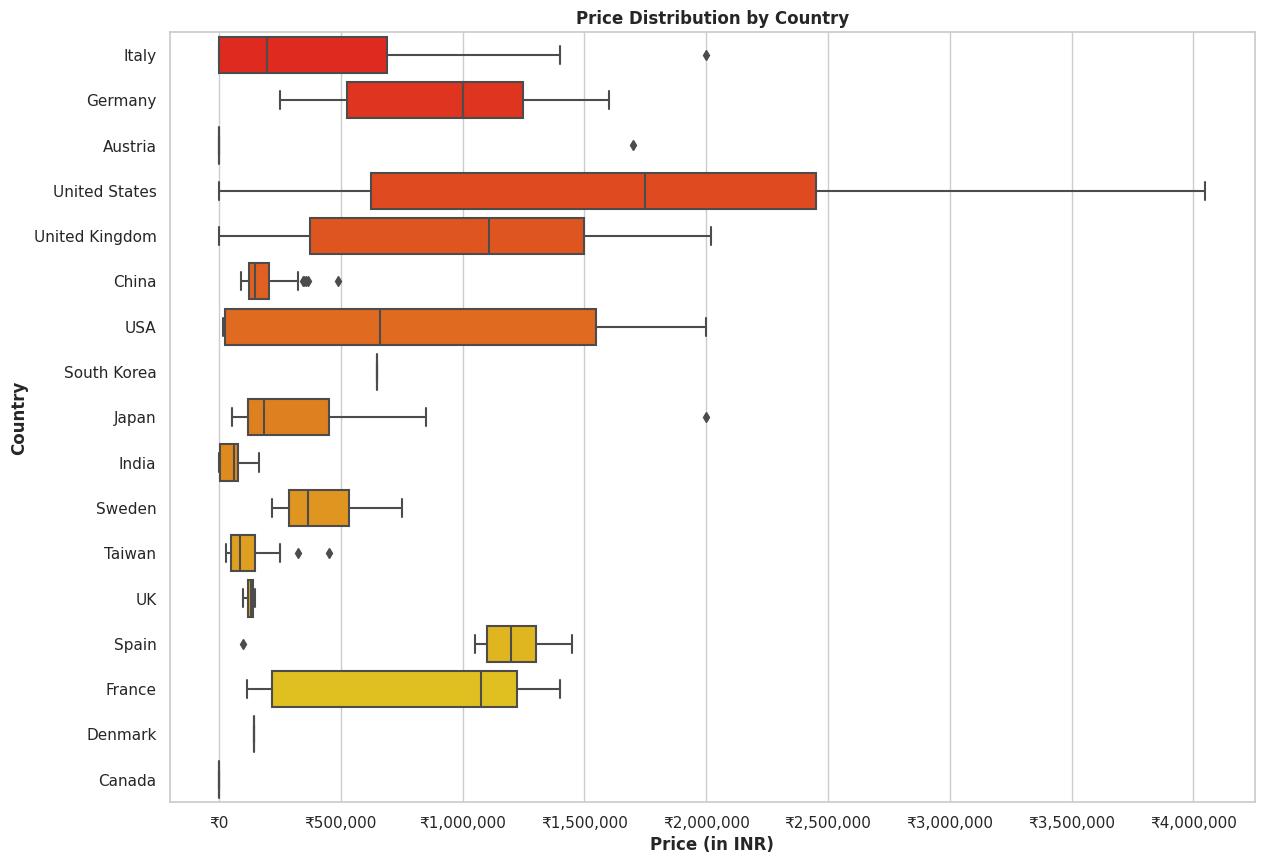

In [ ]:
from matplotlib.ticker import FuncFormatter

def price_formatter(x, pos):
    return f'₹{x:,.0f}'

plt.figure(figsize=(14, 10))

ax = sns.boxplot(data=df, x='Price_(in_INR)', y='Country_of_Origin', palette='autumn')

ax.xaxis.set_major_formatter(FuncFormatter(price_formatter))

plt.title("Price Distribution by Country", fontweight='bold')
plt.xlabel("Price (in INR)", fontweight='bold')
plt.ylabel("Country", fontweight='bold')

plt.show()


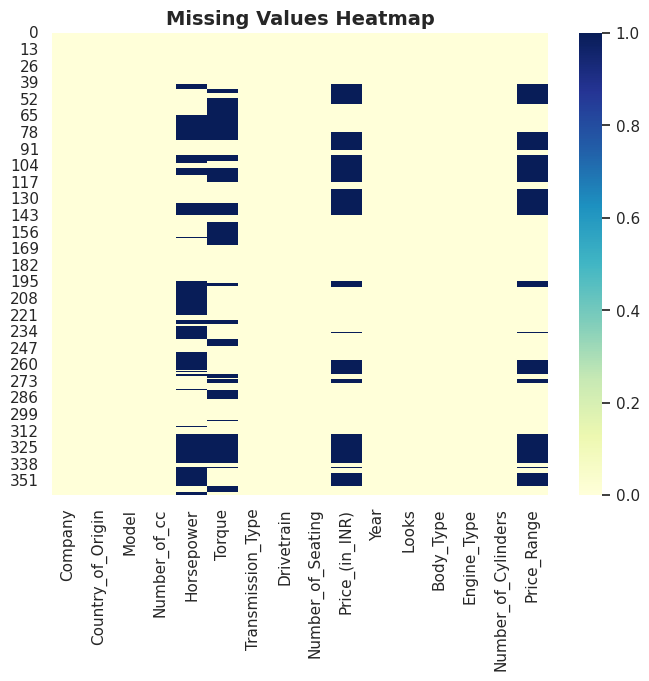

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(),cmap='YlGnBu',)
plt.title('Missing Values Heatmap', fontweight='bold', fontsize=14)
plt.show()


In [ ]:
df.head()

,Company,Country_of_Origin,Model,Number_of_cc,Horsepower,Torque,Transmission_Type,Drivetrain,Number_of_Seating,Price_(in_INR),Year,Looks,Body_Type,Engine_Type,Number_of_Cylinders,Price_Range
0,Aprilia,Italy,RS 660,659,100.0,67.0,Others,Chain,2,1099000.0,2021,Others,Naked,Parallel-twin,2,High
1,Aprilia,Italy,Tuono 660,659,100.0,67.0,Others,Chain,2,1199000.0,2021,Others,Naked,Parallel-twin,2,High
2,Aprilia,Italy,RS 125,125,15.0,12.0,6-speed manual,Chain,2,449000.0,2022,Others,Racing,Single-cylinder,1,Low
3,Aprilia,Italy,Shiver 900,896,95.0,90.0,6-speed manual,Shaft,2,1399000.0,2022,Adventure,Naked,V-twin,2,High
4,Aprilia,Italy,Tuono 1100,1077,175.0,121.0,6-speed manual,Shaft,2,1999000.0,2022,Adventure,Naked,V-twin,2,Very High


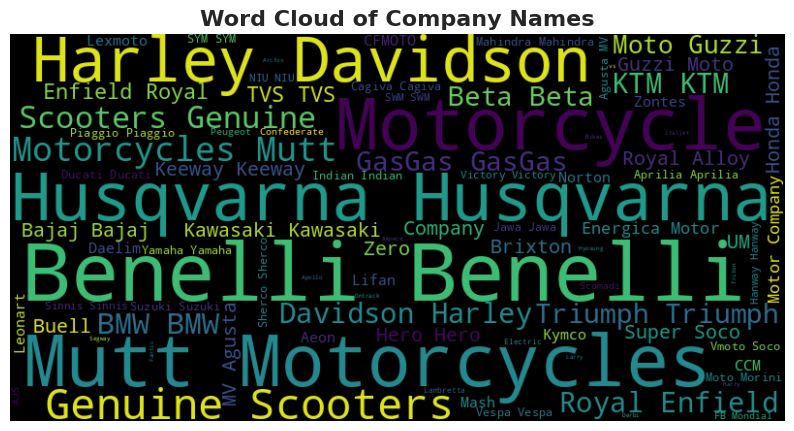

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(data, column_name, title, colormap):
    text = ' '.join(data[column_name].astype(str))

    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap=colormap, max_words=100).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()

generate_word_cloud(df, 'Company', 'Word Cloud of Company Names', 'viridis')

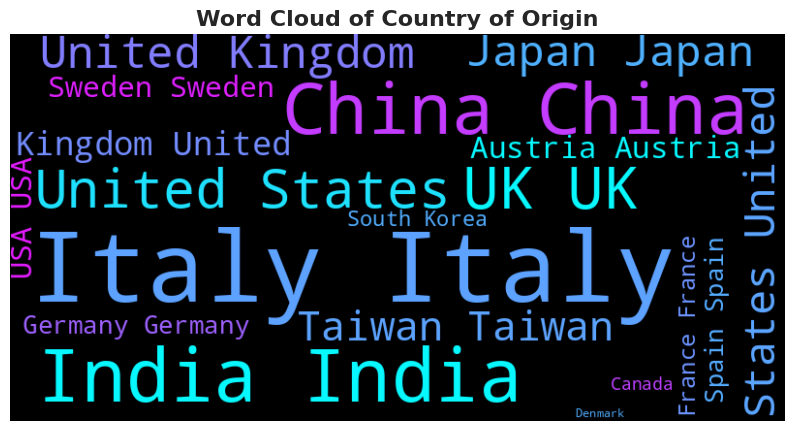

In [47]:
generate_word_cloud(df, 'Country_of_Origin', 'Word Cloud of Country of Origin', 'cool')

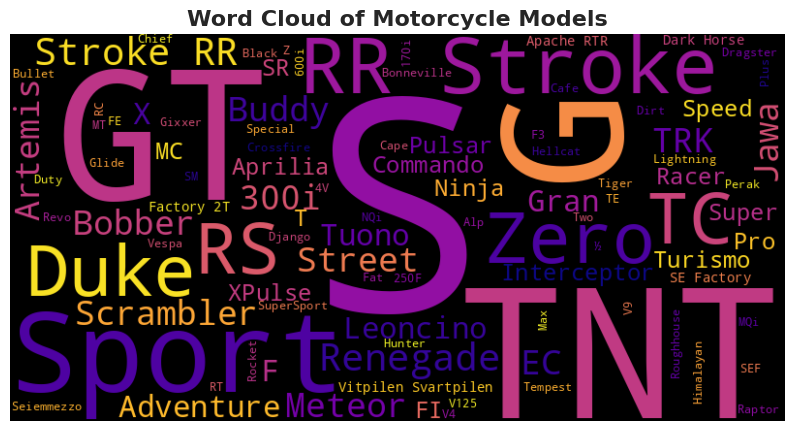

In [48]:
generate_word_cloud(df, 'Model', 'Word Cloud of Motorcycle Models', 'plasma')